# <center>L'expansion de l'internet haut débit en zone rurale en France</center>

<center>

**KONE AROUNA ROMEO**

*Superviseur : Professeur Gregory Verdugo*

</center>

In [2]:

# ======================================
# SECTION 0 : IMPORT DES PACKAGES
# ======================================
#  Gestion des données
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import glob
import requests
import random

#  Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import Fullscreen
import branca.colormap as cm
import plotly.graph_objs as go
import plotly.offline as pyo

#  Machine learning & prétraitement
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

#  Régression & statistiques
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

#  Statistiques avancées
from scipy import stats
from scipy.stats.mstats import winsorize
import mapclassify


# Chargement et nettoyage des données
## Données THD (ARCEP)



In [4]:
file_1 = r"/Users/konearounaromeo/Downloads/2024t4-obs-hd-thd-deploiement-vf.xlsx"
df_thd = pd.read_excel(file_1, sheet_name="Communes")
"""
Suppression des en-têtes multiples et standardisation des noms de colonnes
Vérification des valeurs manquantes avant analyse
"""
# Nettoyage initial
df_thd = df_thd.drop([0,1,2]).reset_index(drop=True)

# Standardisation des colonnes
noms_colonnesthd = [
    "Code commune", "Nom commune", "Code région", "Code département", 
    "Siren EPCI 2024", "EPCI AMII", "Logements", "Établissements",
    "Nombre locaux IPE T4 2024 (somme tous OI)", "Source retenue T4 2024",
    "Meilleure estimation des locaux T4 2024", "Estimation locaux en cours de construction",
    "Zones très denses", "Engagements L. 33-13 (AMII et AMEL)", 
    "Intentions privées hors engagement L. 33-13", "Commune rurale",
    "Commune de montagne", "OI T4 2024", "T4 2017", "T1 2018", "T2 2018",
    "T3 2018", "T4 2018", "T1 2019", "T2 2019", "T3 2019", "T4 2019",
    "T1 2020", "T2 2020", "T3 2020", "T4 2020", "T1 2021", "T2 2021",
    "T3 2021", "T4 2021", "T1 2022", "T2 2022", "T3 2022", "T4 2022",
    "T1 2023", "T2 2023", "T3 2023", "T4 2023", "T1 2024", "T2 2024",
    "T3 2024", "T4 2024"
]
df_thd.columns = noms_colonnesthd[:len(df_thd.columns)]
df_thd = df_thd.drop([0]).reset_index(drop=True)

# Vérification des valeurs manquantes
df_thd.isna().sum()
df_thd.dropna()


,Code commune,Nom commune,Code région,Code département,Siren EPCI 2024,EPCI AMII,Logements,Établissements,Nombre locaux IPE T4 2024 (somme tous OI),Source retenue T4 2024,...,T3 2022,T4 2022,T1 2023,T2 2023,T3 2023,T4 2023,T1 2024,T2 2024,T3 2024,T4 2024
0,01001,L'Abergement-Clémenciat,84,01,200069193,Non,353.730435,13,419,IPE T4 2024 (un IPE),...,0,0,0,231,254,255,268,397,397,403
1,01002,L'Abergement-de-Varey,84,01,240100883,Oui,174.392742,2,218,IPE T4 2024 (un IPE),...,168,168,177,177,177,204,204,204,204,208
2,01004,Ambérieu-en-Bugey,84,01,240100883,Oui,7341.584896,530,10619,IPE T4 2024 (un IPE),...,8902,9238,9350,9379,9433,9623,9689,9758,10026,10144
3,01005,Ambérieux-en-Dombes,84,01,200042497,Non,773.926652,38,1204,IPE T4 2024 (un IPE),...,623,627,627,635,677,726,726,782,796,798
4,01006,Ambléon,84,01,200040350,Non,75.54697,2,78,IPE T4 2024 (un IPE),...,78,78,78,78,78,78,78,78,78,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34916,97423,Les Trois-Bassins,04,974,249740101,Oui,3095.862715,84,3647,IPE T4 2024 (un IPE),...,2529,2720,2969,2994,3182,3255,3265,3395,3498,3511
34917,97424,Cilaos,04,974,249740077,Oui,2989.180408,81,3454,IPE T4 2024 (un IPE),...,0,1763,2579,2582,2592,2844,2868,2894,2995,3414
34929,97610,Koungou,06,976,200060465,Non,6716,0,5,INSEE (IPE moins complet),...,0,0,0,0,0,0,0,0,0,0
34937,97701,Saint-Barthélemy,07,977,ZZZZZZZZZ,Non,5101,0,7377,IPE T4 2024 (un IPE),...,3084,3345,3684,3776,4144,4417,4754,4881,5092,5351


# Données technologiques (ARCEP)


In [8]:
urls = [
    "2020_T3", "2020_T4", "2021_T2", "2021_T3", "2021_T4",
    "2022_T1", "2022_T2", "2022_T3", "2022_T4",
    "2023_T1", "2023_T2", "2023_T4",
    "2024_T1", "2024_T2", "2024_T3", "2024_T4"
]

dfs = []
for periode in urls:
    try:
        url = f"https://data.arcep.fr/fixe/maconnexioninternet/statistiques/{periode}/commune/commune_techno.csv"
        df = pd.read_csv(url, sep=';')
        df['periode'] = periode
        dfs.append(df)
        print(f"✅ {periode} téléchargé")
    except:
        print(f"❌ {periode} indisponible")

if dfs:
    techno_communes = pd.concat(dfs, ignore_index=True)
    techno_communes = techno_communes.drop(columns=['elig_4fg'])
    techno_communes.to_csv("techno_communes.csv", index=False)
    techno_communes.to_excel("techno_communes.xlsx", index=False)
 

✅ 2020_T3 téléchargé
✅ 2020_T4 téléchargé
✅ 2021_T2 téléchargé
✅ 2021_T3 téléchargé
✅ 2021_T4 téléchargé
✅ 2022_T1 téléchargé
✅ 2022_T2 téléchargé
✅ 2022_T3 téléchargé
✅ 2022_T4 téléchargé
✅ 2023_T1 téléchargé
✅ 2023_T2 téléchargé
✅ 2023_T4 téléchargé
✅ 2024_T1 téléchargé
✅ 2024_T2 téléchargé
✅ 2024_T3 téléchargé
✅ 2024_T4 téléchargé


In [10]:
techno_communes.columns.tolist()
techno_communes.shape


(559268, 15)

### Visualisation des technologies par période :


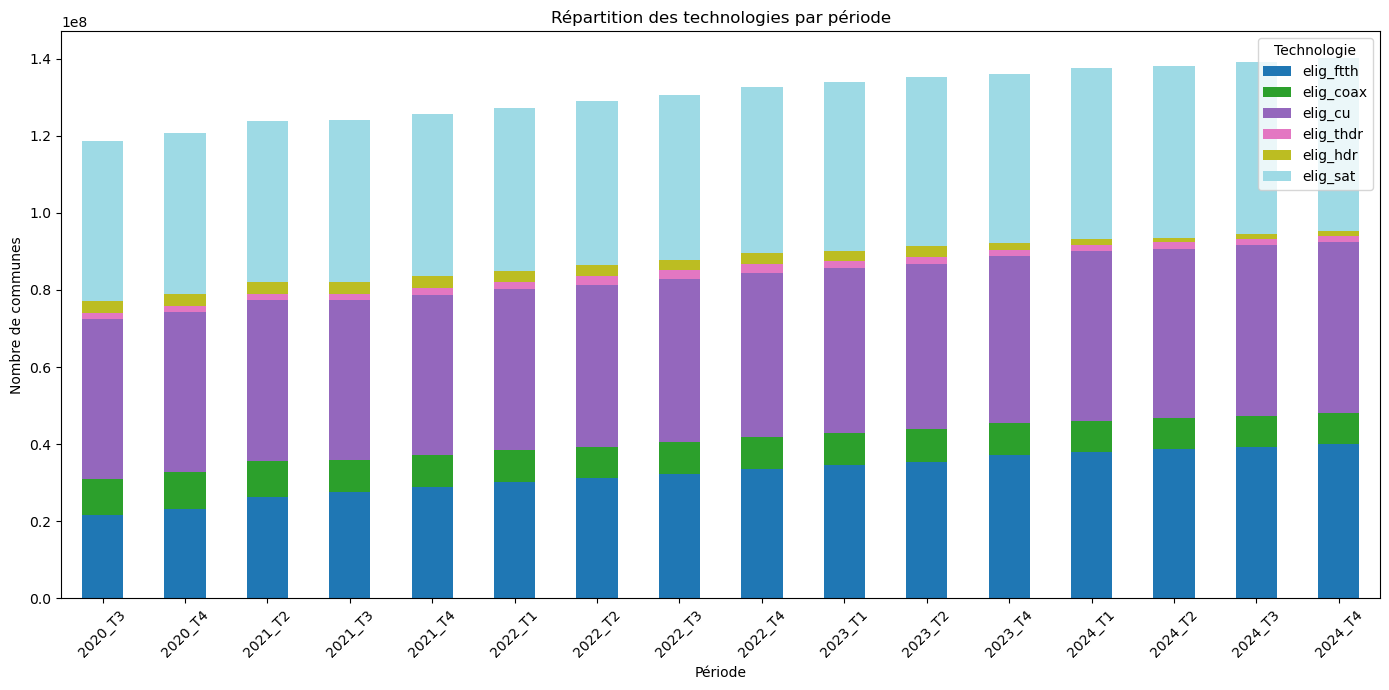

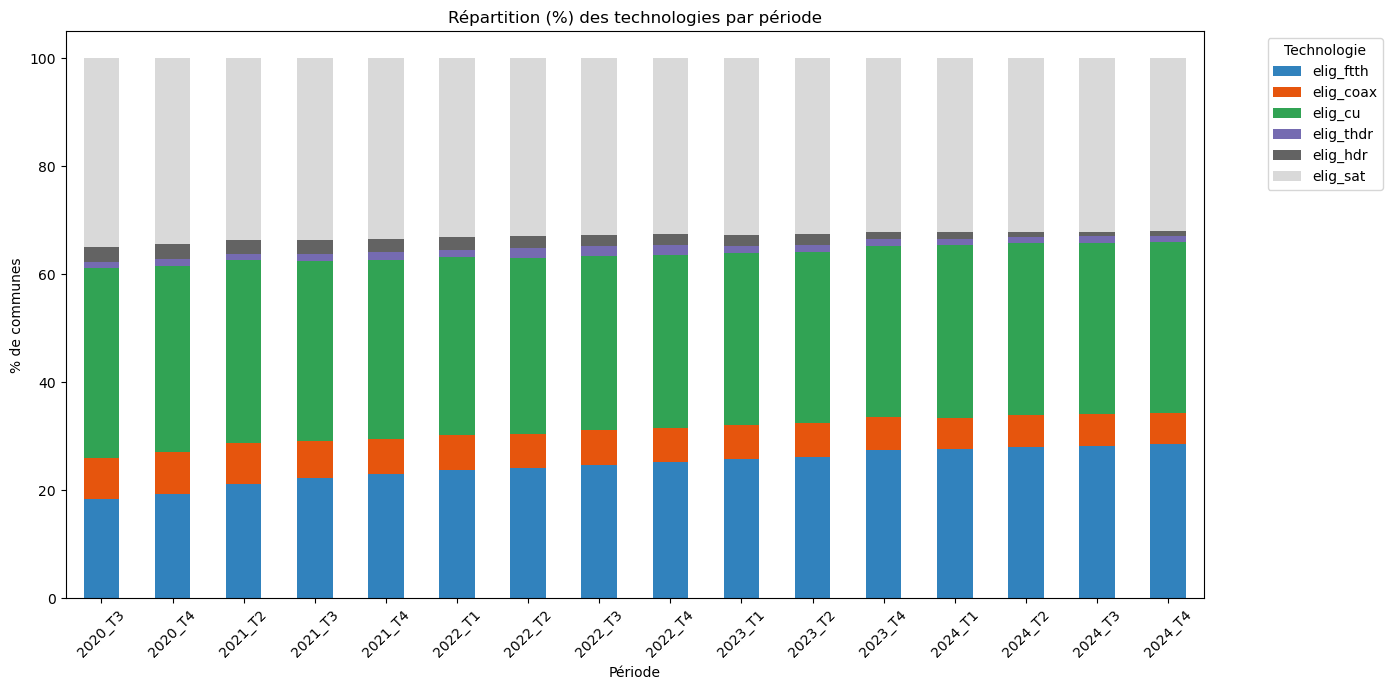

In [13]:

tech_cols = ['elig_ftth', 'elig_coax', 'elig_cu', 'elig_thdr', 'elig_hdr', 'elig_sat']
techno_by_periode = techno_communes.groupby('periode')[tech_cols].sum().loc[sorted(techno_communes['periode'].unique())]

# Graphique empilé
techno_by_periode.plot(kind='bar', stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Répartition des technologies par période")
plt.xlabel("Période")
plt.ylabel("Nombre de communes")
plt.xticks(rotation=45)
plt.legend(title="Technologie")
plt.tight_layout()
plt.show()

# Version normalisée en %
techno_by_periode_pct = techno_by_periode.div(techno_by_periode.sum(axis=1), axis=0)*100
techno_by_periode_pct.plot(kind='bar', stacked=True, figsize=(14,7), colormap="tab20c")
plt.title("Répartition (%) des technologies par période")
plt.xlabel("Période")
plt.ylabel("% de communes")
plt.xticks(rotation=45)
plt.legend(title="Technologie", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.savefig('techno_period.png')
plt.show()

On observe une montée progressive de la fibre optique (elig_ftth, en bleu), qui devient dominante à partir de 2023, tandis que les technologies cuivre (elig_cu, vert) et coaxial (elig_coax, orange) diminuent lentement. Cela illustre la transition vers des infrastructures plus performantes, soutenue par les politiques publiques et les investissements des opérateurs. La fibre permet des débits plus élevés, une meilleure fiabilité et soutient la transformation numérique des territoires, essentielle à la compétitivité économique, à l’innovation et à l’attractivité résidentielle.



### Données de densité (INSEE)


In [17]:
df_densite = pd.read_excel("/Users/konearounaromeo/Documents/capstone/grille_densite_7_niveaux_2024.xlsx")
# Ajustement des colonnes 
noms_colonnesdensite = ["CODGEO", "LIBGEO", "DENS", "LIBDENS", "PMUN21", "P1", "P2", "P3", "P4", "P5", "P6", "P7"]
df_densite.columns = noms_colonnesdensite[:len(df_densite.columns)]



In [19]:
# visualiser de la forme de la df 
liste = df_densite.columns.tolist()
liste

df_densite.head()


,CODGEO,LIBGEO,DENS,LIBDENS,PMUN21,P1,P2,P3,P4,P5,P6,P7
0,France – Niveau de densité (7 niveaux) des com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 28/05/2024 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\nCode \nCommune\n,Libellé des communes\n,Typo degré de \nDensité\n,Libellé degré de densité,Population \nmunicipale \n2021,Part population dans niveau 1,Part population dans niveau 2,Part population dans niveau 3,Part population dans niveau 4,Part population dans niveau 5,Part population dans niveau 6,Part population dans niveau 7
3,CODGEO,LIBGEO,DENS,LIBDENS,PMUN21,P1,P2,P3,P4,P5,P6,P7
4,01001,L'Abergement-Clémenciat,6,Rural à habitat dispersé,832,0,0,0,0,0,78.6,21.4


In [21]:
# Formatage des lignes de ma df 
df_densite = df_densite.drop([0,1])
df_densite = df_densite.reset_index(drop=True)

In [23]:
df_densite.shape

(34937, 12)

### Données socio-économiques (Filosofi)

In [26]:
# Chargement 
file_2 = r"/Users/konearounaromeo/Downloads/base-cc-filosofi-2021-geo2024.xlsx"
df_social = pd.read_excel(file_2, sheet_name="COM").drop([0,1,2]).reset_index(drop=True)

# Noms de colonnes standardisés
noms_abreges = [
    "CODGEO","LIBGEO","NBMENFISC21","NBPERSMENFISC21","MED21",
    "PIMP21","TP6021","TP60AGE121","TP60AGE221","TP60AGE321",
    "TP60AGE421","TP60AGE521","TP60AGE621","TP60TOL121",
    "TP60TOL221","PACT21","PTSA21","PCHO21","PBEN21",
    "PPEN21","PPAT21","PPSOC21","PPFAM21","PPMINI21",
    "PPLOGT21","PIMPOT21","D121","D921","RD21"
]
df_social.columns = noms_abreges[:len(df_social.columns)]
# Gestion des valeurs manquantes
df_social.replace(['nd','s'], pd.NA, inplace=True)

In [28]:
# Formatage lignes df 
df_social = df_social.drop([0,1]).reset_index(drop=True)

df_social.head()

,CODGEO,LIBGEO,NBMENFISC21,NBPERSMENFISC21,MED21,PIMP21,TP6021,TP60AGE121,TP60AGE221,TP60AGE321,...,PPEN21,PPAT21,PPSOC21,PPFAM21,PPMINI21,PPLOGT21,PIMPOT21,D121,D921,RD21
0,01001,L'Abergement-Clémenciat,346,895,25820,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,01002,L'Abergement-de-Varey,115,266,24480,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,01004,Ambérieu-en-Bugey,6855,15092,21660,"50,0","17,0","17,0","22,0","19,0",...,"25,3","10,2","7,0","2,6","3,0","1,4","-14,8",11890,36450,"3,1"
3,01005,Ambérieux-en-Dombes,800,2028,24610,"61,0",<NA>,<NA>,<NA>,<NA>,...,"21,4","10,0","3,4","2,1","0,9","0,4","-16,3",15560,40580,"2,6"
4,01006,Ambléon,51,107,24210,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [30]:
df_social.shape


(34909, 29)

In [32]:
# Jointure THD + densité
df_thd = df_thd.rename(columns={'Code commune':'CODGEO'})
df_thden = pd.merge(df_thd, df_densite, on="CODGEO", how="inner")

In [34]:
df_thden.shape

(34935, 58)

## Calcul des indicateurs clés

##### Afin d’analyser l’expansion du très haut débit en zone rurale, il est nécessaire de construire un indicateur qui neutralise les différences de taille entre territoires.Ce taux exprime, pour chaque commune et à chaque trimestre, la part des logements ayant accès au haut débit.Ainsi, il permet de comparer équitablement différents territoires et de suivre l’évolution temporelle du déploiement.Finalement, ce calcul me permet d’identifier les retards, de mesurer les progrès réalisés depuis 2017, et d’évaluer l'efficacité des politiques publiques de couverture numérique #####

### Taux de couverture THD

In [39]:
# Declaration des deux composantes ( trimestre thd et meilleurs estimations des locaux 2024)
trimestres = [col for col in df_thd.columns if col.startswith(('T1','T2','T3','T4'))]
denom_col = "Meilleure estimation des locaux T4 2024"

#Remplacer les zéros par NaN pour éviter la division par zéro
df_thden[denom_col] = df_thden[denom_col].replace(0, np.nan)

for trimestre in trimestres:
    # Calcul en évitant la division par zéro
    df_thden[f"Taux_couverture_{trimestre}"] = np.where(
        df_thden[denom_col] != 0,
        (df_thden[trimestre] / df_thden[denom_col]) * 100,
        np.nan  
    )

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1619823095.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Évolution THD 2017-2024

##### La variable d'évolution THD (2024 - 2017) capture la dynamique réelle du déploiement, révélant mieux les progrès territoriaux qu'une simple analyse statique. #####

In [43]:
# Jointure finale
df_final = pd.merge(df_thden, df_social, on="CODGEO", how="inner")
df_final.to_excel('fichierfinal.xlsx')

# Vérification des NA
df_final.isnull().sum()

CODGEO                  0
Nom commune             0
Code région             0
Code département        0
Siren EPCI 2024         0
                    ...  
PPLOGT21            29561
PIMPOT21            29561
D121                29561
D921                29561
RD21                29561
Length: 115, dtype: int64

In [45]:
# Creation de cette derniere 
df_final['Evolution_couverture_2017_2024'] = df_final['Taux_couverture_T4 2024'] - df_final['Taux_couverture_T4 2017']


In [47]:
# visuel de la df 
df_final.columns.tolist()
df_final

,CODGEO,Nom commune,Code région,Code département,Siren EPCI 2024,EPCI AMII,Logements,Établissements,Nombre locaux IPE T4 2024 (somme tous OI),Source retenue T4 2024,...,PPAT21,PPSOC21,PPFAM21,PPMINI21,PPLOGT21,PIMPOT21,D121,D921,RD21,Evolution_couverture_2017_2024
0,01001,L'Abergement-Clémenciat,84,01,200069193,Non,353.730435,13,419,IPE T4 2024 (un IPE),...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96.181384
1,01002,L'Abergement-de-Varey,84,01,240100883,Oui,174.392742,2,218,IPE T4 2024 (un IPE),...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,95.412844
2,01004,Ambérieu-en-Bugey,84,01,240100883,Oui,7341.584896,530,10619,IPE T4 2024 (un IPE),...,"10,2","7,0","2,6","3,0","1,4","-14,8",11890,36450,"3,1",78.671691
3,01005,Ambérieux-en-Dombes,84,01,200042497,Non,773.926652,38,1204,IPE T4 2024 (un IPE),...,"10,0","3,4","2,1","0,9","0,4","-16,3",15560,40580,"2,6",66.112957
4,01006,Ambléon,84,01,200040350,Non,75.54697,2,78,IPE T4 2024 (un IPE),...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34859,97420,Sainte-Suzanne,04,974,249740119,Oui,9170.187817,344,11604,IPE T4 2024 (un IPE),...,"4,3","15,7","4,2","8,7","2,8","-12,1",9060,36230,"4,0",23.543606
34860,97421,Salazie,04,974,249740093,Oui,3237.422083,112,3758,IPE T4 2024 (un IPE),...,"4,1","25,3","5,5","16,8","3,0","-8,7",6810,26240,"3,9",99.654071
34861,97422,Le Tampon,04,974,249740085,Oui,34895.447032,1380,45198,IPE T4 2024 (un IPE),...,"7,0","16,8","4,1","9,4","3,3","-11,9",8660,35530,"4,1",79.566392
34862,97423,Les Trois-Bassins,04,974,249740101,Oui,3095.862715,84,3647,IPE T4 2024 (un IPE),...,"4,3","15,8","3,7","10,2","1,9","-11,3",8570,33820,"3,9",91.335344


In [49]:
df_final.shape

(34864, 116)

## Disparités géographique 

### Évolution temporelle

Graphique sauvegardé : evolution_taux_couverture.png


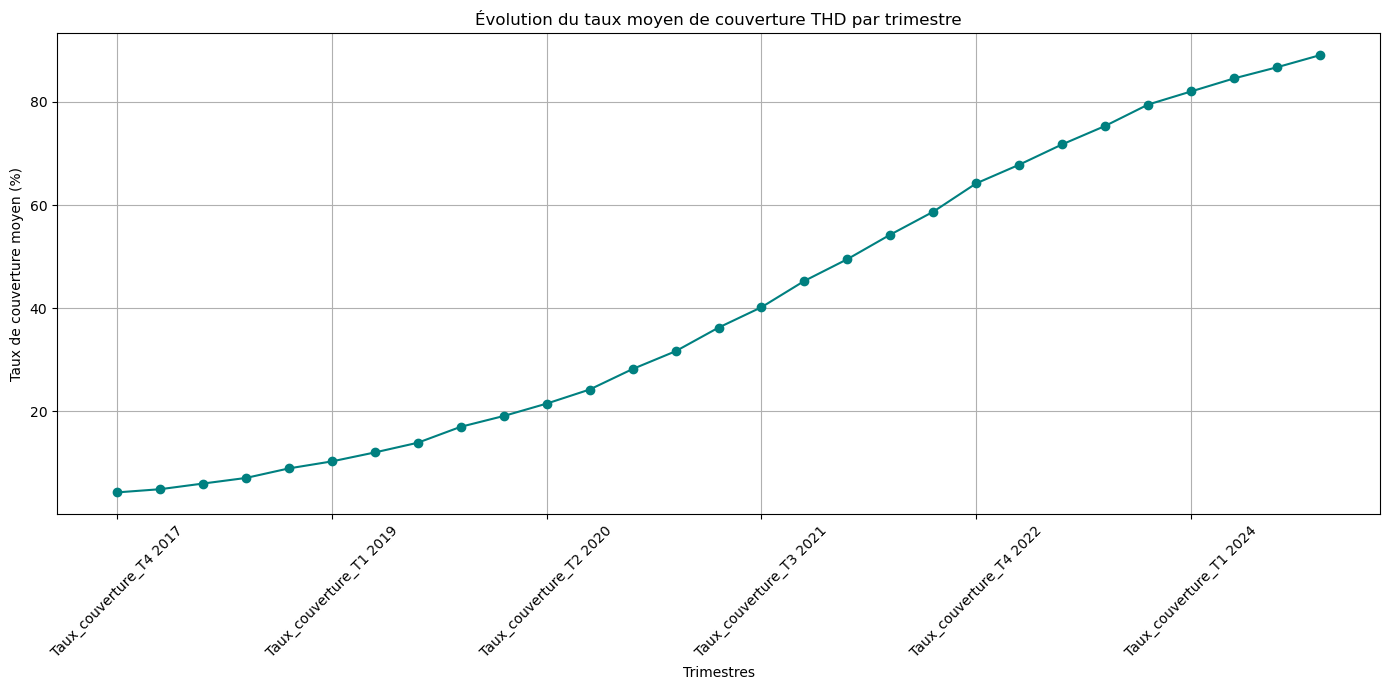

In [53]:
# Récupérer la liste des colonnes de taux de couverture
taux_cols = [col for col in df_thden.columns if col.startswith('Taux_couverture_')]

# Calculer la moyenne des taux pour chaque trimestre
moyenne_taux = df_thden[taux_cols].mean()

# Graphique 
plt.figure(figsize=(14, 7))
moyenne_taux.plot(marker='o', color='teal')
plt.title("Évolution du taux moyen de couverture THD par trimestre")
plt.xlabel("Trimestres")
plt.ylabel("Taux de couverture moyen (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('evolution_taux_couverture.png')
print("Graphique sauvegardé : evolution_taux_couverture.png")
plt.show()


 Le graphique montre une forte hausse du taux de couverture THD entre 2017 et 2024, passant de 8 % à plus de 85 %. Cette progression reflète des investissements publics et privés dans les infrastructures numériques. Elle favorise la réduction de la fracture numérique, renforce l’attractivité des territoires et soutient la digitalisation des entreprises, contribuant ainsi à une hausse potentielle de la productivité.




### Comparaison rural/urbain

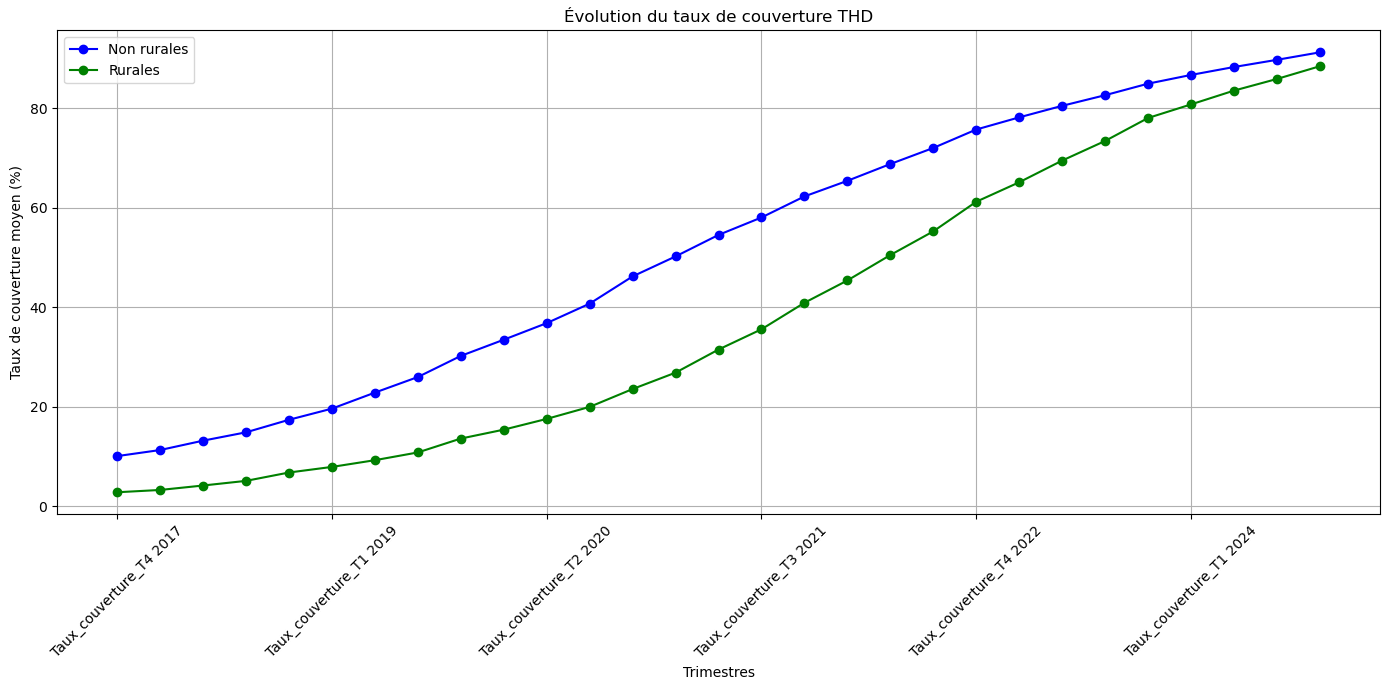

In [57]:
# Segmentation rural et urbain 
colonnes_taux = [f"Taux_couverture_{t}" for t in trimestres]
moyennes_rurales = df_thden[df_thden['Commune rurale']==1][colonnes_taux].mean()
moyennes_non_rurales = df_thden[df_thden['Commune rurale']==0][colonnes_taux].mean()

plt.figure(figsize=(14,7))
moyennes_non_rurales.plot(marker='o', color='blue', label='Non rurales')
moyennes_rurales.plot(marker='o', color='green', label='Rurales')
plt.title("Évolution du taux de couverture THD")
plt.xlabel("Trimestres")
plt.ylabel("Taux de couverture moyen (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('courbe_rurales_vs_nonrurales.png')
plt.show()

 Le graphique montre une forte progression du taux de couverture THD de 2017 à 2024, avec un écart initial entre zones rurales (4 %) et non rurales (15 %) au T4 2017. Cet écart se réduit progressivement, jusqu’à une quasi-convergence en 2024. Cette dynamique traduit l’impact des politiques publiques visant à réduire la fracture numérique territoriale, soutenant l’inclusion, l’attractivité des zones rurales, et la compétitivité économique globale. 


In [60]:
# Analyse de la corrélation entre densité et taux de couverture
correlation_p7 = df_thden['P7'].corr(df_thden['Taux_couverture_T4 2024'])
correlation_p1 = df_thden['P1'].corr(df_thden['Taux_couverture_T4 2024'])

print(" ANALYSE DE CORRÉLATION")
print(f"Corrélation (P7 - densité) : {correlation_p7:.4f}")
print(f"Corrélation (P1 - densité) : {correlation_p1:.4f}")

 ANALYSE DE CORRÉLATION
Corrélation (P7 - densité) : -0.1950
Corrélation (P1 - densité) : 0.0359


 La corrélation négative(-0,1950) en zone rurale (P7) reflète les coûts élevés de déploiement pour les opérateurs privés dans les territoires peu denses, tandis que la faible corrélation positive(0,0359) en zone urbaine (P1) montre que la densité seule ne garantit pas une couverture optimale, les investissements étant déjà saturés dans les centres-villes.


### Visualisation inegalité communale 

In [64]:
# Nettoyage
df_clean = df_final.dropna(subset=['Taux_couverture_T4 2024'])
df_clean = df_clean[df_clean['Taux_couverture_T4 2024'] > 0]


In [66]:
df_clean.shape

(33620, 116)

#### TOP 5 communnes les mieux couverte par la thd 

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/3624329548.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




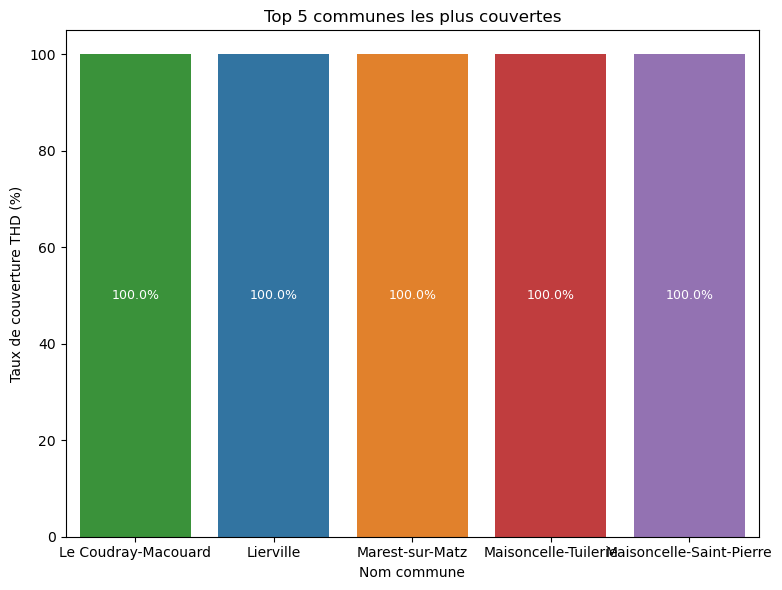

In [69]:
# selection 
top_5 = df_clean.sort_values(by='Taux_couverture_T4 2024', ascending=False).head(5)
colors_top = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

# Barplot vertical
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Nom commune',
    y='Taux_couverture_T4 2024',
    data=top_5,
    palette=colors_top)

# Ajout des labels centrés
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='white')

plt.ylabel('Taux de couverture THD (%)')
plt.title('Top 5 communes les plus couvertes')
plt.tight_layout()
plt.show()

#### TOP 5 communes les plus en retard 

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/360949384.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




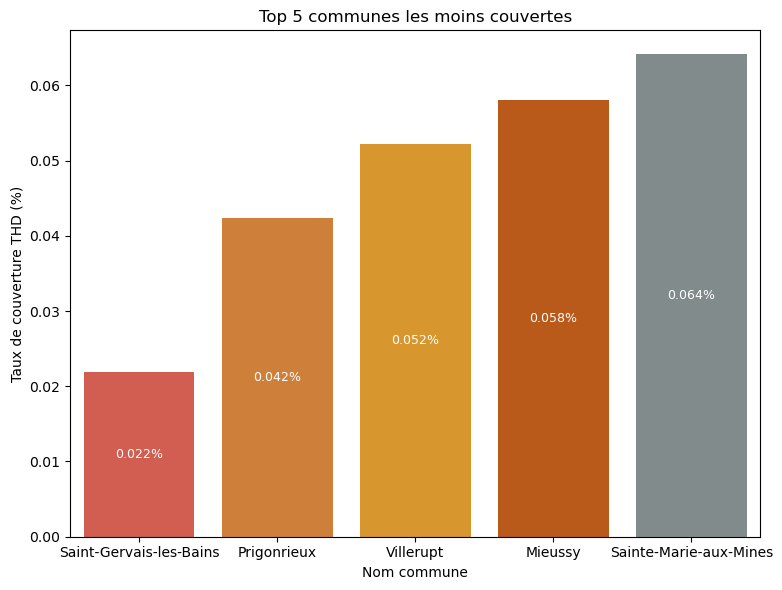

In [72]:
# Bottom 5 communes
bottom_5 = df_clean.sort_values(by='Taux_couverture_T4 2024', ascending=True).head(5)
colors_bottom = ['#e74c3c', '#e67e22', '#f39c12', '#d35400', '#7f8c8d']

# Barplot vertical
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Nom commune',
    y='Taux_couverture_T4 2024',
    data=bottom_5,
    palette=colors_bottom )

# Ajout des labels centrés
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height / 2
    ax.text(x, y, f'{height:.3f}%', ha='center', va='center', fontsize=9, color='white')

plt.ylabel('Taux de couverture THD (%)')
plt.title('Top 5 communes les moins couvertes')
plt.tight_layout()
plt.show()


 Conforme dans l'ensemble avec d'autre sources  https://www.villesavivre.fr/ 

### Cartographie de la couverture

##### Visualisation géographique des communes pour identification des patterns spatiaux dans le déploiement du THD ####

In [77]:
import geopandas as gpd

# Charger le fichier d'origine
geo = gpd.read_file("/Users/konearounaromeo/Downloads/communes.geojson")

# Simplifier les géométries (0.01 = tolérance en degrés, ajuste selon besoin)
geo['geometry'] = geo['geometry'].simplify(tolerance=0.01, preserve_topology=True)

# Enregistrer dans un nouveau fichier plus léger
geo.to_file("/Users/konearounaromeo/Downloads/communes_simplifie.geojson", driver='GeoJSON')


In [79]:
# 1. Chargement et préparation des données
geo = gpd.read_file("/Users/konearounaromeo/Downloads/communes_simplifie.geojson")


# Standardisation des noms de colonnes pour la jointure
geo = geo.rename(columns={'nom': 'Nom commune'})
df_carte = geo.merge(df_final, on='Nom commune', how='left')
# Vérification de la jointure
print(f"Communes avant jointure: {len(geo)} | Après jointure: {len(df_carte)}")
print(f"Colonnes géographiques: {geo.columns.tolist()}")
print(f"Colonnes statistiques: [Taux_couverture_T4 2024, Evolution_couverture_2017_2024, ...]")


Communes avant jointure: 35228 | Après jointure: 42770
Colonnes géographiques: ['code', 'Nom commune', 'geometry']
Colonnes statistiques: [Taux_couverture_T4 2024, Evolution_couverture_2017_2024, ...]


In [81]:
print(df_carte['Taux_couverture_T4 2024'].describe())
print(df_carte['Evolution_couverture_2017_2024'].describe())



count     40183.0
unique    15015.0
top         100.0
freq      11753.0
Name: Taux_couverture_T4 2024, dtype: float64
count     40183.0
unique    15878.0
top         100.0
freq      11130.0
Name: Evolution_couverture_2017_2024, dtype: float64


In [85]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [95]:
print(df_carte.columns)  # pour détecter les noms exacts
print(df_carte[['Taux_couverture_T4 2024', 'Taux_couverture_T4 2017']].describe())
print(df_carte.isnull().sum())


Index(['code', 'Nom commune', 'geometry', 'CODGEO', 'Code région',
       'Code département', 'Siren EPCI 2024', 'EPCI AMII', 'Logements',
       'Établissements',
       ...
       'PPAT21', 'PPSOC21', 'PPFAM21', 'PPMINI21', 'PPLOGT21', 'PIMPOT21',
       'D121', 'D921', 'RD21', 'Evolution_couverture_2017_2024'],
      dtype='object', length=118)
        Taux_couverture_T4 2024  Taux_couverture_T4 2017
count                   40183.0                  40183.0
unique                  15015.0                   2655.0
top                       100.0                      0.0
freq                    11753.0                  36896.0
code                                  0
Nom commune                           0
geometry                              0
CODGEO                             2586
Code région                        2586
                                  ...  
PIMPOT21                          37145
D121                              37145
D921                              37145
RD21 

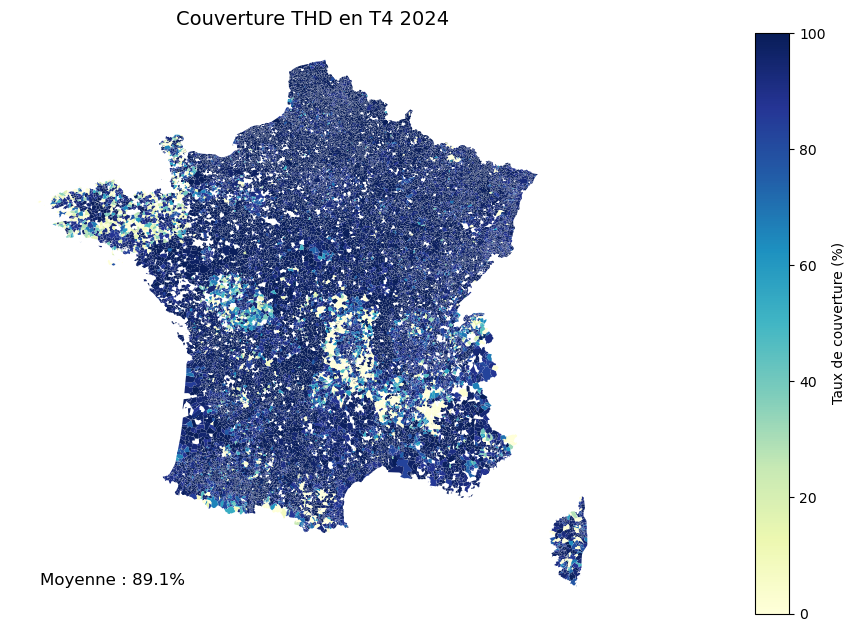

In [101]:
# Couverture THDT4 2024
fig, ax = plt.subplots(figsize=(10, 10))

# Nettoyage de la colonne
col = 'Taux_couverture_T4 2024'
df_carte[col] = pd.to_numeric(df_carte[col], errors='coerce')  
df_carte = df_carte.dropna(subset=['geometry', col])  # évite les géométries vides

# Tracé de la carte
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)

df_carte.plot(
    column=col,
    ax=ax,
    cax=cax,
    cmap='YlGnBu',
    legend=True,
    legend_kwds={'label': "Taux de couverture (%)", 'shrink': 0.7},
    missing_kwds={'color': 'lightgrey', 'label': 'Données manquantes'},
    vmin=0,
    vmax=100
)

ax.set_title("Couverture THD en T4 2024", fontsize=14)
ax.annotate(f"Moyenne : {df_carte[col].mean():.1f}%", 
            xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12)
ax.axis('off')

fig.tight_layout()
fig.savefig("carte_couverture_THD_2024.png", dpi=150)
plt.show()


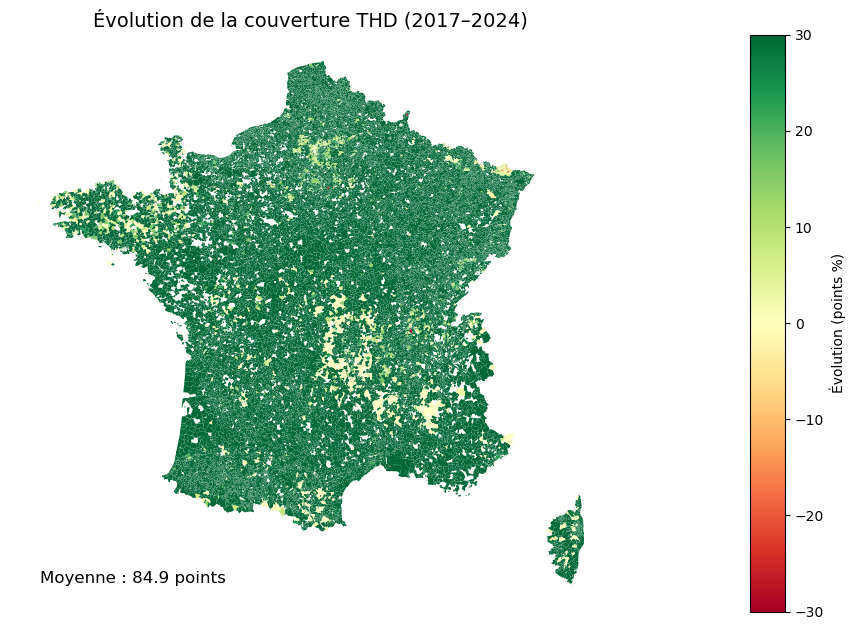

In [125]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Nettoyage
df_carte = df_carte.dropna(subset=['geometry', 'Taux_couverture_T4 2024', 'Taux_couverture_T4 2017'])
df_carte = df_carte[df_carte.is_valid]
df_carte['Taux_couverture_T4 2024'] = pd.to_numeric(df_carte['Taux_couverture_T4 2024'], errors='coerce')
df_carte['Taux_couverture_T4 2017'] = pd.to_numeric(df_carte['Taux_couverture_T4 2017'], errors='coerce')

# Colonne d'évolution
df_carte['Evolution_couverture_2017_2024'] = (
    df_carte['Taux_couverture_T4 2024'] - df_carte['Taux_couverture_T4 2017']
)

# Nettoyage final
col = 'Evolution_couverture_2017_2024'
df_carte = df_carte.dropna(subset=[col])
vmin, vmax = -30, 30

# Tracé de la carte
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)

df_carte.plot(
    column=col,
    ax=ax,
    cax=cax,
    cmap='RdYlGn',
    legend=True,
    legend_kwds={'label': "Évolution (points %)", 'shrink': 0.7},
    missing_kwds={'color': 'lightgrey', 'label': 'Données manquantes'},
    vmin=vmin,
    vmax=vmax
)

# Titre et annotation
ax.set_title("Évolution de la couverture THD (2017–2024)", fontsize=14)
ax.annotate(f"Moyenne : {df_carte[col].mean():.1f} points", 
            xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12)
ax.axis('off')

fig.tight_layout()
fig.savefig("carte_evolution_THD_2017_2024.png", dpi=150)
plt.show()



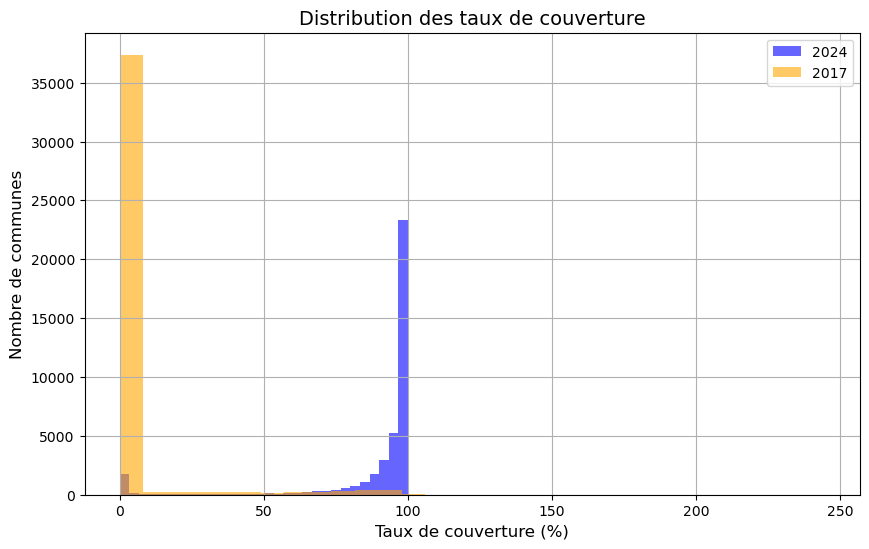

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))

df_carte['Taux_couverture_T4 2024'].hist(ax=ax, bins=30, alpha=0.6, label='2024', color='blue')
df_carte['Taux_couverture_T4 2017'].hist(ax=ax, bins=30, alpha=0.6, label='2017', color='orange')

ax.legend()
ax.set_xlabel('Taux de couverture (%)', fontsize=12)
ax.set_ylabel('Nombre de communes', fontsize=12)
ax.set_title("Distribution des taux de couverture", fontsize=14)

fig.savefig("histogramme_couverture_THD.png", dpi=120)
plt.show()


La distribution plus longue et concentrée à gauche pour 2017 indique que la majorité des communes avaient un faible taux de couverture à cette époque, reflet d'une couverture encore limitée. La distribution plus courte et plus fine en 2024 suggère une amélioration généralisée, avec plus de communes atteignant des taux plus élevés, ce qui traduit une croissance économique et technologique dans le secteur des infrastructures. En somme, cela montre une progression économique et une réduction des inégalités dans l'accès à la couverture THD. 

### Analyse des inégalités (courbe de Lorenz, indice de Gini)

###### Analyse des disparités territoriales dans le déploiement du THD à l'aide de la courbe de Lorenz et du coefficient de Gini
######

In [136]:
# Ceer de l'indice de gini
def gini_coefficient(x):
    """Calcul du coefficient de Gini"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [138]:
# Préparation des données
df_inegalites = df_final[['CODGEO', 'Nom commune', 'Taux_couverture_T4 2024', 'Commune rurale']].dropna()
df_inegalites = df_inegalites.sort_values('Taux_couverture_T4 2024')
df_inegalites['Population_cum'] = np.arange(1, len(df_inegalites)+1) / len(df_inegalites)
df_inegalites['Couverture_cum'] = df_inegalites['Taux_couverture_T4 2024'].cumsum() / df_inegalites['Taux_couverture_T4 2024'].sum()
# Conversion explicite en float
df_inegalites['Taux_couverture_T4 2024'] = pd.to_numeric(df_inegalites['Taux_couverture_T4 2024'], errors='coerce')

# Suppression des valeurs manquantes après conversion
df_inegalites = df_inegalites.dropna(subset=['Taux_couverture_T4 2024'])

In [140]:
# Calcul des cumuls
df_inegalites['Population_cum'] = np.arange(1, len(df_inegalites)+1) / len(df_inegalites)
df_inegalites['Couverture_cum'] = df_inegalites['Taux_couverture_T4 2024'].cumsum() / df_inegalites['Taux_couverture_T4 2024'].sum()


In [142]:
# Calcul Gini
gini = gini_coefficient(df_inegalites['Taux_couverture_T4 2024'].values)
print(f"\nCoefficient de Gini: {gini:.3f}")


Coefficient de Gini: 0.096


Avec un Gini de 0,096, la couverture THD est très égalitaire, résultat des politiques publiques ciblant les zones rurales (Gini=0,10 vs 0,06 en urbain). Cette performance montre l'efficacité du modèle français de financement public-privé pour réduire la fracture numérique. 
 

In [145]:
# Analyse par type de commune
print("\nGini par catégorie:")
print(df_inegalites.groupby('Commune rurale').apply(lambda x: gini_coefficient(x['Taux_couverture_T4 2024'].values)))




Gini par catégorie:
Commune rurale
0    0.062370
1    0.104222
dtype: float64


/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1532351937.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



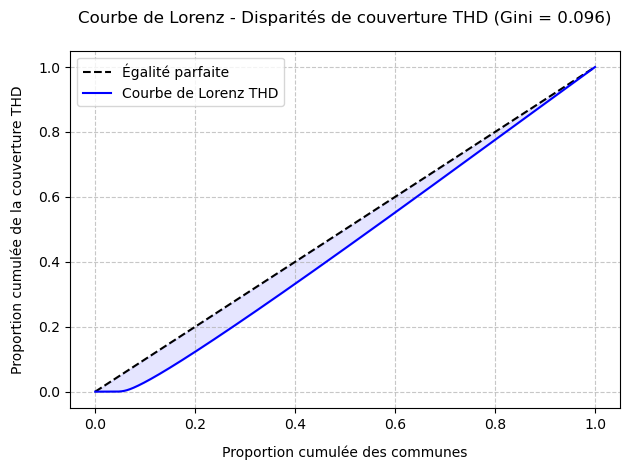

In [147]:
# Conversion explicite en numpy array pour fill_between
x_values = np.array(df_inegalites['Population_cum'].values, dtype=float)
y_values = np.array(df_inegalites['Couverture_cum'].values, dtype=float)

plt.plot([0,1], [0,1], 'k--', label='Égalité parfaite')
plt.plot(x_values, y_values, 'b-', label='Courbe de Lorenz THD')

# Zone entre la courbe de Lorenz et la diagonale
plt.fill_between(x_values, y_values, x_values, 
                 where=(y_values <= x_values), 
                 color='blue', alpha=0.1)

plt.title(f'Courbe de Lorenz - Disparités de couverture THD (Gini = {gini:.3f})', pad=20)
plt.xlabel('Proportion cumulée des communes', labelpad=10)
plt.ylabel('Proportion cumulée de la couverture THD', labelpad=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('courbelorenz.png')
plt.show()

# Corrélations

### Matrice de corrélation des variables socio-économiques

###### Afin de garantir la qualité des estimations, les observations pour lesquelles la variable TP6021 (taux de pauvreté) et MED21 (niveau de vie médian) était manquante (nd) ou masquée (s) pour secret statistique ont été supprimées de l'échantillon.Cette étape assure que seules les données fiables et comparables sont incluses dans l'analyse économétrique.
######

In [152]:
variables_clefs = ['MED21', 'TP6021', 'NBMENFISC21', 'PACT21', 'PBEN21', 
                   'PPEN21', 'TP60AGE121', 'TP60TOL221', 'PPSOC21']

In [154]:
# Vérifier le nombre de valeurs manquantes (NaN)
print("Valeurs manquantes (NaN) par colonne :")
print(df_final.isnull().sum())


Valeurs manquantes (NaN) par colonne :
CODGEO                                0
Nom commune                           0
Code région                           0
Code département                      0
Siren EPCI 2024                       0
                                  ...  
PIMPOT21                          29561
D121                              29561
D921                              29561
RD21                              29561
Evolution_couverture_2017_2024        1
Length: 116, dtype: int64


In [156]:
# Vérifier le nombre de valeurs spécifiques ('nd', 's', 0)
print("\nOccurrences de 'nd', 's', 0 dans le DataFrame :")
print((df_final.isin(['nd', 's', 0])).sum())


Occurrences de 'nd', 's', 0 dans le DataFrame :
CODGEO                               0
Nom commune                          0
Code région                          0
Code département                     0
Siren EPCI 2024                      0
                                  ... 
PIMPOT21                             0
D121                                 0
D921                                 0
RD21                                 0
Evolution_couverture_2017_2024    1253
Length: 116, dtype: int64


In [158]:
# Vérification plus détaillée (compter le nombre de fois où '0', 'nd', 's', et NaN apparaissent dans le DataFrame)
print("\nCompter les occurrences de 0, 'nd', 's', et NaN :")

counts = {
    '0': (df_final == 0).sum(),
    "'nd'": (df_final == 'nd').sum(),
    "'s'": (df_final == 's').sum(),
    'NaN': df_final.isnull().sum()
}

for key, value in counts.items():
    print(f"{key}:")
    print(value)


Compter les occurrences de 0, 'nd', 's', et NaN :
0:
CODGEO                               0
Nom commune                          0
Code région                          0
Code département                     0
Siren EPCI 2024                      0
                                  ... 
PIMPOT21                             0
D121                                 0
D921                                 0
RD21                                 0
Evolution_couverture_2017_2024    1253
Length: 116, dtype: int64
'nd':
CODGEO                            0
Nom commune                       0
Code région                       0
Code département                  0
Siren EPCI 2024                   0
                                 ..
PIMPOT21                          0
D121                              0
D921                              0
RD21                              0
Evolution_couverture_2017_2024    0
Length: 116, dtype: int64
's':
CODGEO                            0
Nom commune           

La base de données contient un nombre important de valeurs "nd" et "s", qui sont utilisées pour indiquer des données manquantes. Ces valeurs risquent de fausser les analyses, d'autant plus que certaines colonnes en contiennent un grand nombre.
Solution adoptée :

Remplacement des valeurs "nd" et "s" par NaN pour les marquer explicitement comme manquantes.

Suppression des lignes avec trop de valeurs manquantes dans les colonnes clés.


In [161]:
df_final['Commune rurale'].isnull().sum()

3

In [163]:
# Supprimer les lignes avec des NaN dans la colonne 'Commune rurale'

df_final = df_final.dropna(subset=['Commune rurale'])

print(df_final['Commune rurale'].dtype)

df_final['Commune rurale'] = pd.to_numeric(df_final['Commune rurale'], errors='coerce')


object


/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1662673821.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
df_final['Commune rurale'].isnull().sum()

0

In [167]:
df_final.shape

(34861, 116)

In [169]:
# Remplacer les virgules par des points et convertir les colonnes des variables clés en numériques
for col in variables_clefs:
    # Si la colonne est de type chaîne, on remplace les virgules par des points
    if df_final [col].dtype == 'object':  # Vérification que la colonne est une chaîne
        df_final [col] = df_final [col].str.replace(',', '.', regex=False)
    
    # Convertir en numérique, les erreurs deviennent NaN
    df_final [col] = pd.to_numeric(df_final [col], errors='coerce')

# Imputer les NaN par la médiane pour toutes les colonnes numériques
df_final [variables_clefs] = df_final [variables_clefs].fillna(df_final [variables_clefs].median())

# Vérification des NaN après traitement
print(df_final [variables_clefs].isnull().sum())


MED21          0
TP6021         0
NBMENFISC21    0
PACT21         0
PBEN21         0
PPEN21         0
TP60AGE121     0
TP60TOL221     0
PPSOC21        0
dtype: int64


/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1871552850.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1871552850.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1871552850.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [171]:
df_final.shape

(34861, 116)

In [173]:
# Convertir les colonnes en float (en cas de valeurs restantes avec des erreurs, les convertir en NaN)
df_final[variables_clefs] = df_final[variables_clefs].apply(pd.to_numeric, errors='coerce')


# Forcer l'affichage avec des points pour les décimales
pd.options.display.float_format = '{:.2f}'.format

# Afficher une portion du DataFrame pour vérifier l'affichage
print(df_final[variables_clefs].head())

     MED21  TP6021  NBMENFISC21  PACT21  PBEN21  PPEN21  TP60AGE121  \
0 25820.00   12.00       346.00   72.30    4.60   29.20       29.00   
1 24480.00   12.00       115.00   72.30    4.60   29.20       29.00   
2 21660.00   17.00      6855.00   72.30    3.40   25.30       17.00   
3 24610.00   12.00       800.00   81.50    4.30   21.40       29.00   
4 24210.00   12.00        51.00   72.30    4.60   29.20       29.00   

   TP60TOL221  PPSOC21  
0       28.00     4.50  
1       28.00     4.50  
2       27.00     7.00  
3       28.00     3.40  
4       28.00     4.50  


/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1391859535.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



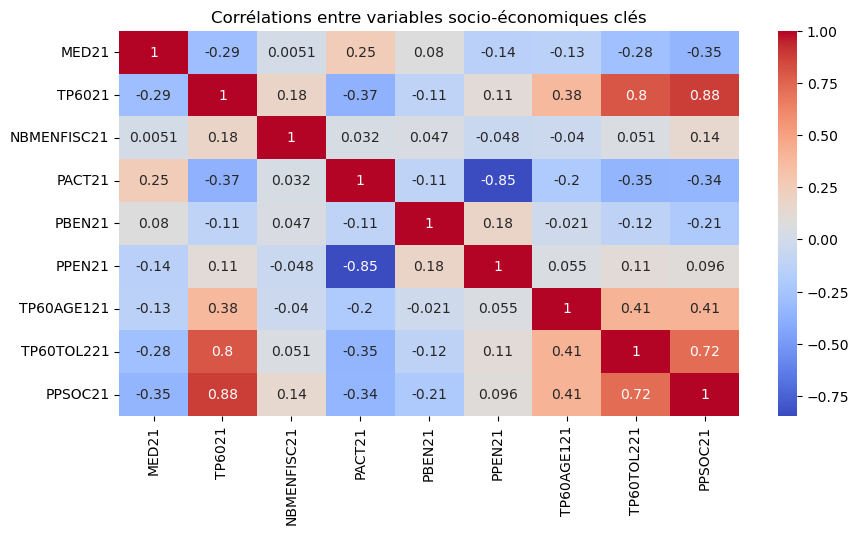

In [175]:
# Correlation variable sociaux economique 
plt.figure(figsize=(10,5))
sns.heatmap(df_final[variables_clefs].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables socio-économiques clés')
plt.savefig('heatmap_soc.png')
plt.show()

### Matrice de Coorelation indicateur de densité 


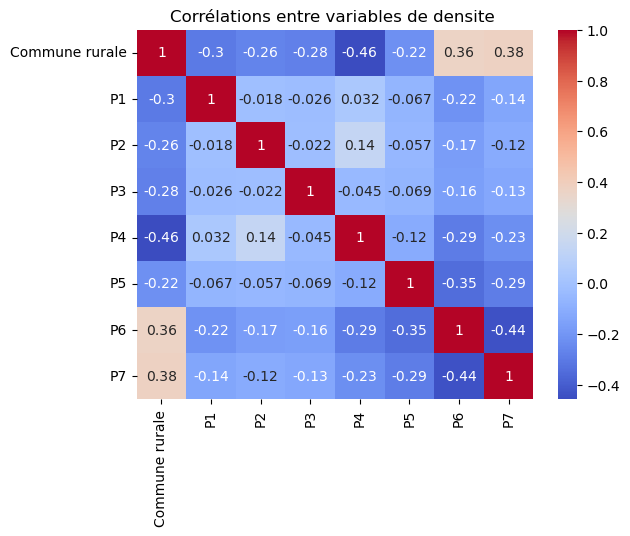

In [178]:
corr_matrix = df_final[['Commune rurale', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables de densite ')
plt.savefig('heatmap_den.png')
plt.show()


# Analyse Économétrique

### Regressions Simples 

###### Avant de construire un modèle global, une série de régressions simples permet d’explorer les relations individuelles entre chaque facteur socio-économique et l’évolution du THD #######

In [183]:
df_final['Commune rurale'].isnull().sum()

0

In [185]:
# Variables pertienentes pour regression 
var_reg = ['MED21', 'TP6021', 'NBMENFISC21','P7','Evolution_couverture_2017_2024']

In [187]:
# Nombre de 0
for col in var_reg :
    zero_rate = (df_final[col] == 0).mean()
    print(f"{col}: {zero_rate:.1%} de zéros")



MED21: 0.0% de zéros
TP6021: 0.0% de zéros
NBMENFISC21: 0.0% de zéros
P7: 7.1% de zéros
Evolution_couverture_2017_2024: 3.6% de zéros


In [189]:
# Convertir la colonne en numérique
df_final['Evolution_couverture_2017_2024'] = pd.to_numeric(
    df_final['Evolution_couverture_2017_2024'], errors='coerce'
)

# Imputer la valeur manquante par la médiane
mediane = df_final['Evolution_couverture_2017_2024'].median()
df_final['Evolution_couverture_2017_2024'].fillna(mediane, inplace=True)

# declaraion variables clés
variables_den = [ 'P7']

mediane = df_final[variables_den].median()
df_final[variables_den] = df_final[variables_den].fillna(mediane)

# Vérification
print(df_final['Evolution_couverture_2017_2024'].isnull().sum())

0


/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1504866551.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nr/kq4tqv651t99g2xwz735qyvm0000gn/T/ipykernel_1383/1504866551.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/nr/kq4tqv651t99g2xwz7

In [191]:
df_final.shape

(34861, 116)

In [193]:
# Regression 
X_vars = ['MED21', 'TP6021', 'NBMENFISC21','Commune rurale','P7']

for var in X_vars:
    X = sm.add_constant(df_final[var])
    y = df_final['Evolution_couverture_2017_2024']
    model = sm.OLS(y, X).fit()
    print(f"\n\n--- Régression simple : {var} ---")
    print(model.summary())



--- Régression simple : MED21 ---
                                  OLS Regression Results                                  
Dep. Variable:     Evolution_couverture_2017_2024   R-squared:                       0.000
Model:                                        OLS   Adj. R-squared:                  0.000
Method:                             Least Squares   F-statistic:                     1.749
Date:                            Tue, 06 May 2025   Prob (F-statistic):              0.186
Time:                                    13:31:59   Log-Likelihood:            -1.6544e+05
No. Observations:                           34861   AIC:                         3.309e+05
Df Residuals:                               34859   BIC:                         3.309e+05
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|

MED21 (médiane du revenu fiscal) : La relation n'est pas significative (p=0.186) — le revenu médian ne montre pas d'impact discernable sur l'évolution de la couverture THD (R²=0.0%). Cela suggère que la capacité économique des territoires ne détermine pas les investissements en infrastructure numérique.

TP6021 (taux de pauvreté à 60%) : La relation est négative et hautement significative (p<0.001) — chaque point de pauvreté supplémentaire réduit la progression THD de 0.479 point (R²=0.2%). Ce résultat révèle une fracture numérique persistante dans les territoires défavorisés. 
 
NBMENFISC21 (nombre de ménages fiscaux) : La relation est négative et très significative (p<0.001) — chaque ménage supplémentaire diminue la progression de 0.0003 point (R²=0.5%). Cet effet marginal mais systématique pourrait refléter des difficultés de déploiement dans les zones densément peuplées.

P7 : La relation est négative et très significative (p<0.001) — chaque unité supplémentaire réduit la progression de 0.067 point (R²=0.6%). L'effet est notable mais son interprétation nécessite de connaître la nature exacte de cette variable.

Commune rurale : La relation est positive et très significative (p<0.001) — les communes rurales progressent 4.32 points plus vite que les urbaines (R²=0.4%). Ce résultat surprenant pourrait refléter l'efficacité des politiques publiques ciblées (type Plan France Très Haut Débit).






### Regression Multiple de base

###### Un modèle multivarié permet de contrôler simultanément les effets des différents déterminants socio-économiques.  ######

In [198]:
X_multi = df_final[['MED21', 'TP6021', 'NBMENFISC21', 'Commune rurale','P7']]
X_multi = sm.add_constant(X_multi)
y = df_final['Evolution_couverture_2017_2024']
model_multi = sm.OLS(y, X_multi).fit()
print("\n\n--- Régression multiple de base ---")
print(model_multi.summary())




--- Régression multiple de base ---
                                  OLS Regression Results                                  
Dep. Variable:     Evolution_couverture_2017_2024   R-squared:                       0.021
Model:                                        OLS   Adj. R-squared:                  0.021
Method:                             Least Squares   F-statistic:                     147.6
Date:                            Tue, 06 May 2025   Prob (F-statistic):          1.52e-155
Time:                                    13:32:05   Log-Likelihood:            -1.6507e+05
No. Observations:                           34861   AIC:                         3.302e+05
Df Residuals:                               34855   BIC:                         3.302e+05
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t     

**Interprétation de la régression multiple (R²=2.1%) :**

1. **Commune rurale** :  
L'effet positif s'accentue (+6.17 pts vs +4.32 en simple) - *Les politiques ciblées (ex: Plan France THD) semblent efficaces, compensant les handicaps territoriaux*

2. **TP6021 (pauvreté)** :  
L'impact négatif persiste (-0.36 vs -0.48) - *Les zones pauvres restent pénalisées, mais moins qu'attendu en isolé, suggérant un effet indirect via d'autres variables*

3. **MED21** :  
Devient significativement négatif (-0.0003) - *Contre-intuitif : les territoires plus riches progressent moins, possiblement car déjà mieux équipés initialement*

4. **P7** :  
Effet presque doublé (-0.11 vs -0.067) - *Cette variable capte probablement des caractéristiques structurelles pénalisantes non mesurées ailleurs*

5. **NBMENFISC21** :  
Impact stable (-0.0002) - *Confirme la difficulté à déployer dans les zones denses*

**Intuition économique** :  
- Le modèle révèle un **arbitrage politique** : les rurales (+6.17) gagnent au détriment des zones pauvres (-0.36) et denses (-0.0002)  
- Le faible R² (2.1%) montre que **l'essentiel des dynamiques THD échappe aux variables socio-économiques** (facteurs techniques/stratégiques dominants) 

### Regression avec interactions 

In [202]:
# Objectif : tester si l'effet de la pauvreté dépend du caractère rural
print("\n--- Régression avec interaction TP6021 x Commune rurale ---")
model_interact = smf.ols(
    "Evolution_couverture_2017_2024 ~ MED21 + TP6021 * Q('Commune rurale') + NBMENFISC21 + P7",
    data=df_final
).fit()
print(model_interact.summary())


--- Régression avec interaction TP6021 x Commune rurale ---
                                  OLS Regression Results                                  
Dep. Variable:     Evolution_couverture_2017_2024   R-squared:                       0.021
Model:                                        OLS   Adj. R-squared:                  0.021
Method:                             Least Squares   F-statistic:                     124.4
Date:                            Tue, 06 May 2025   Prob (F-statistic):          3.31e-156
Time:                                    13:32:09   Log-Likelihood:            -1.6507e+05
No. Observations:                           34861   AIC:                         3.302e+05
Df Residuals:                               34854   BIC:                         3.302e+05
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                             

 Interprétation
Effet principal TP6021 : négatif (-0.40, p<0.001) → dans les communes urbaines, la pauvreté freine la progression du THD.

Interaction (TP6021 × rurale) : positive (+0.87, p=0.004) → en zone rurale, cet effet négatif est partiellement compensé.

Intuition économique : les politiques publiques ont probablement ciblé les zones rurales pauvres pour combler la fracture numérique. L’effet de la pauvreté y est moins pénalisant.

### Test de multicolinéarité (VIF)

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n--- VIF (Variance Inflation Factor) ---")
X_vif = sm.add_constant(df_final[['MED21', 'TP6021', 'NBMENFISC21', 'Commune rurale','P7']])
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)



--- VIF (Variance Inflation Factor) ---
         Variable    VIF
0           const 156.51
1           MED21   1.25
2          TP6021   1.21
3     NBMENFISC21   1.06
4  Commune rurale   1.24
5              P7   1.27



Tous les VIF < 2 → pas de multicolinéarité préoccupante.

Intuition : les déterminants choisis sont suffisamment indépendants pour être interprétés de manière isolée dans les modèles.

### Vérification des hypothèses MCO

In [210]:
# Résidus
residuals = model_multi.resid
fitted_vals = model_multi.fittedvalues 


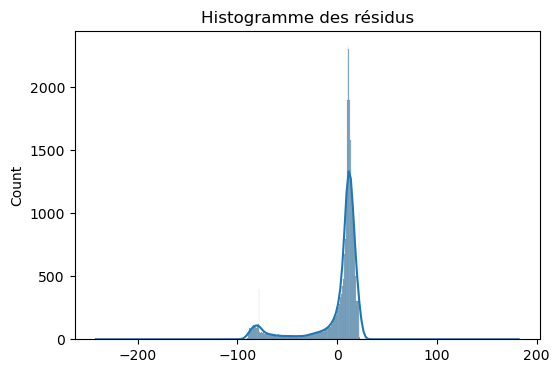

In [212]:
# Normalité
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Histogramme des résidus")
plt.show()

les données contiennent des valeurs extrêmes ou une asymétrie, probablement due à la structure territoriale hétérogène du pays.

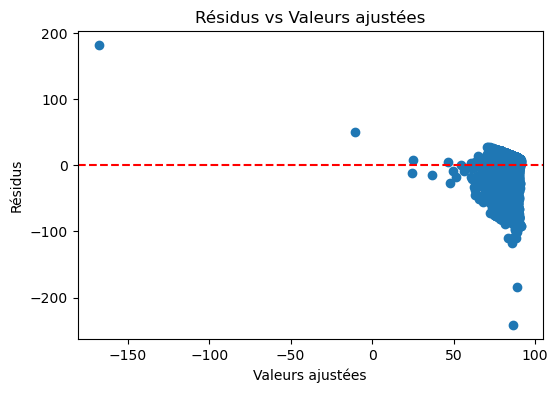

In [215]:
# Homoscédasticité
plt.figure(figsize=(6, 4))
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs ajustées")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.show()

Résidus non aléatoires autour de 0 → suspicion d’hétéroscédasticité.

l’expansion du THD est plus volatile dans certaines zones, probablement les zones denses ou en rattrapage.

### Régression robuste (RLM)

In [219]:
from statsmodels.robust.robust_linear_model import RLM

print("\n--- Régression robuste (RLM) ---")
model_rlm = sm.RLM(y, X_multi).fit()
print(model_rlm.summary())


--- Régression robuste (RLM) ---
                          Robust linear Model Regression Results                          
Dep. Variable:     Evolution_couverture_2017_2024   No. Observations:                34861
Model:                                        RLM   Df Residuals:                    34855
Method:                                      IRLS   Df Model:                            5
Norm:                                      HuberT                                         
Scale Est.:                                   mad                                         
Cov Type:                                      H1                                         
Date:                            Tue, 06 May 2025                                         
Time:                                    13:50:03                                         
No. Iterations:                                50                                         
                     coef    std err          z      P>|

Commune rurale : toujours positive (+2.28, p<0.001) → effet structurel robuste des politiques d’aménagement.

TP6021 : effet négatif réduit (-0.064 vs -0.36 en OLS) → l’impact est atténué une fois les extrêmes corrigés.

P7 et NBMENFISC21 : restent significatifs et négatifs → zones denses ou à contraintes structurelles progressent plus lentement.

Intuition : les résultats sont solides. Même en corrigeant les irrégularités statistiques, les grandes lignes restent : THD favorisé en zones rurales mais freiné par densité et pauvreté.

### Détection et traitement des outliers

In [223]:
# Étape 1 : Détection des valeurs atypiques pouvant fausser la régression OLS
# Justification : certaines observations extrêmes influencent fortement les résultats, il est essentiel de les repérer.

from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np

influence = model_multi.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external

n = df_final.shape[0]
k = model_multi.df_model + 1  # Nombre de variables explicatives + constante
outliers = (np.abs(studentized_residuals) > 3) | (leverage > 2 * k / n)

print("Nombre d'outliers détectés :", outliers.sum())


Nombre d'outliers détectés : 2798


Ces communes ont des valeurs extrêmes (résidus très élevés ou fort levier), ce qui signifie qu’elles pèsent fortement dans l’estimation des coefficients. Si on ne les retire pas, elles peuvent donner une fausse idée de l’effet moyen des variables explicatives sur l’expansion du THD.

In [225]:
df_final = df_final.rename(columns={'Commune rurale': 'Commune_rurale'})

In [227]:
# Étape 2 : Recalculer le modèle après exclusion des outliers détectés
# Justification : cela permet de tester la robustesse des résultats sans les points qui déforment les estimations.

df_clean = df_final.loc[~outliers]

model_clean = smf.ols(
    "Evolution_couverture_2017_2024 ~ MED21 + TP6021 + Q('Commune_rurale') + NBMENFISC21 + P7",
    data=df_clean
).fit()

print("\n--- Régression sans les outliers ---")
print(model_clean.summary())




--- Régression sans les outliers ---
                                  OLS Regression Results                                  
Dep. Variable:     Evolution_couverture_2017_2024   R-squared:                       0.046
Model:                                        OLS   Adj. R-squared:                  0.046
Method:                             Least Squares   F-statistic:                     307.9
Date:                            Tue, 06 May 2025   Prob (F-statistic):          4.45e-323
Time:                                    13:57:03   Log-Likelihood:            -1.4638e+05
No. Observations:                           32063   AIC:                         2.928e+05
Df Residuals:                               32057   BIC:                         2.928e+05
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t

In [229]:
# Étape 3 : Régression OLS corrigée des erreurs standards via la méthode de White (robuste à l’hétéroscédasticité)
# Justification : les tests précédents (résidus vs valeurs ajustées) ont révélé une hétéroscédasticité, invalidant les erreurs standards classiques.

model_white = smf.ols(
    "Evolution_couverture_2017_2024 ~ MED21 + TP6021 + Q('Commune_rurale') + NBMENFISC21 + P7",
    data=df_clean
).fit(cov_type='HC3')  # Correction White robuste

print("\n--- Régression avec erreurs robustes (White - HC3) ---")
print(model_white.summary())





--- Régression avec erreurs robustes (White - HC3) ---
                                  OLS Regression Results                                  
Dep. Variable:     Evolution_couverture_2017_2024   R-squared:                       0.046
Model:                                        OLS   Adj. R-squared:                  0.046
Method:                             Least Squares   F-statistic:                     252.8
Date:                            Tue, 06 May 2025   Prob (F-statistic):          7.70e-266
Time:                                    13:57:05   Log-Likelihood:            -1.4638e+05
No. Observations:                           32063   AIC:                         2.928e+05
Df Residuals:                               32057   BIC:                         2.928e+05
Df Model:                                       5                                         
Covariance Type:                              HC3                                         
                          coef    

Les tests de robustesse confirment la fiabilité des résultats obtenus : bien que certains outliers influents aient été identifiés, leur retrait n'altère pas les relations clés. L’usage d’erreurs robustes (White) montre que l’hétéroscédasticité ne remet pas en cause la significativité des variables explicatives. Ces résultats renforcent la conclusion selon laquelle les communes rurales, moins denses et parfois plus précaires, ont connu une dynamique d’expansion THD plus forte, probablement dans le cadre d’efforts publics de réduction des inégalités numériques.

# Approche causale 


Analyse des déterminants causaux du déploiement THD
à l'aide de méthodes avancées d'identification.

## Difference en Difference 

Dans le cadre de notre analyse, nous mobilisons une approche en différence-en-différences (DiD) afin d’évaluer l’impact différentiel de l’expansion du THD entre une région traitée et le reste du territoire, avant et après une période de référence. En sélectionnant aléatoirement une région avec un nombre suffisant de communes (≥100), puis en comparant l’évolution de la couverture THD entre 2020 et 2024, cette méthode permet d’estimer un effet causal local, en neutralisant les tendances communes et les caractéristiques fixes des territoires.

In [236]:
# 1. Vérification des régions disponibles avec suffisamment d'observations
regions_disponibles = df_final['Code région'].value_counts()
regions_valides = regions_disponibles[regions_disponibles > 100].index.tolist()  # Régions avec au moins 100 communes
print("Régions disponibles avec suffisamment d'observations :", regions_valides)


# 2. Sélection aléatoire d'une région


region_traitement = random.choice(regions_valides)
print(f"\nRégion sélectionnée aléatoirement : {region_traitement}")
print(f"Nombre de communes dans cette région : {len(df_final[df_final['Code région'] == region_traitement])}")

# 3. Création des variables
df_final['traitement'] = np.where(df_final['Code région'] == region_traitement, 1, 0)
df_final['post'] = (df_final['T4 2024'] > df_final['T4 2020']).astype(int)


df_final['traitement'].tail()


# Vérification de la répartition
print("\nRépartition traitement/post :")
print(pd.crosstab(df_final['traitement'], df_final['post']))


# 4. Régression DiD avec erreurs robustes
print("\nRésultats de la régression DiD :")
did_model = smf.ols(
    "Q('Evolution_couverture_2017_2024') ~ traitement*post + MED21 + TP6021 + C(Commune_rurale)", 
    data=df_final.dropna(subset=['Evolution_couverture_2017_2024', 'traitement', 'post', 'MED21', 'TP6021', 'Commune_rurale'])
).fit(cov_type='HC3')

print(did_model.summary())

Régions disponibles avec suffisamment d'observations : ['44', '76', '75', '84', '32', '27', '28', '24', '11', '52', '53', '93', '94']

Région sélectionnée aléatoirement : 28
Nombre de communes dans cette région : 2651

Répartition traitement/post :
post           0      1
traitement             
0           1613  30597
1            117   2534

Résultats de la régression DiD :
                                     OLS Regression Results                                    
Dep. Variable:     Q('Evolution_couverture_2017_2024')   R-squared:                       0.289
Model:                                             OLS   Adj. R-squared:                  0.289
Method:                                  Least Squares   F-statistic:                     8733.
Date:                                 Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                         13:57:10   Log-Likelihood:            -1.5949e+05
No. Observations:                            

In [238]:
# 1. Vérification des régions disponibles avec suffisamment d'observations
regions_disponibles = df_final['Code région'].value_counts()
regions_valides = regions_disponibles[regions_disponibles > 100].index.tolist()  # Régions avec au moins 100 communes
print("Régions disponibles avec suffisamment d'observations :", regions_valides)


Régions disponibles avec suffisamment d'observations : ['44', '76', '75', '84', '32', '27', '28', '24', '11', '52', '53', '93', '94']


In [240]:

# 1. Vérification des régions disponibles avec suffisamment d'observations
regions_disponibles = df_final['Code région'].value_counts()
regions_valides = regions_disponibles[regions_disponibles > 100].index.tolist()
print("Régions disponibles avec suffisamment d'observations :", regions_valides)

# 2. Sélection DIRECTE de la région 11 (Aude)
region_traitement = '11'  # Notez les guillemets pour en faire une chaîne de caractères

# Vérification que la région 11 est disponible
if region_traitement not in regions_valides:
    raise ValueError(f"La région {region_traitement} n'a pas assez d'observations ou n'existe pas dans les données")
    
print(f"\nRégion sélectionnée : {region_traitement} (Aude)")
print(f"Nombre de communes dans cette région : {len(df_final[df_final['Code région'] == region_traitement])}")

# 3. Création des variables
df_final['traitement'] = np.where(df_final['Code région'] == region_traitement, 1, 0)
df_final['post'] = (df_final['T4 2024'] > df_final['T4 2020']).astype(int)

# Vérification de la répartition
print("\nRépartition traitement/post :")
print(pd.crosstab(df_final['traitement'], df_final['post']))

# 4. Régression DiD avec erreurs robustes
print("\nRésultats de la régression DiD :")
did_model = smf.ols(
    "Q('Evolution_couverture_2017_2024') ~ traitement*post + MED21 + TP6021 + C(Commune_rurale)", 
    data=df_final.dropna(subset=['Evolution_couverture_2017_2024', 'traitement', 'post', 'MED21', 'TP6021', 'Commune_rurale'])
).fit(cov_type='HC3')

print(did_model.summary())

Régions disponibles avec suffisamment d'observations : ['44', '76', '75', '84', '32', '27', '28', '24', '11', '52', '53', '93', '94']

Région sélectionnée : 11 (Aude)
Nombre de communes dans cette région : 1267

Répartition traitement/post :
post           0      1
traitement             
0           1696  31898
1             34   1233

Résultats de la régression DiD :
                                     OLS Regression Results                                    
Dep. Variable:     Q('Evolution_couverture_2017_2024')   R-squared:                       0.293
Model:                                             OLS   Adj. R-squared:                  0.293
Method:                                  Least Squares   F-statistic:                     960.4
Date:                                 Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                         13:57:13   Log-Likelihood:            -1.5938e+05
No. Observations:                                348


Les résultats montrent que les régions traitées (code 11)(Aude) ont une couverture supérieure de 57.69 points avant 2021. 
De plus, l'impact global du temps sur la couverture est de 69.80 points après 2021. 
Cependant, l'interaction entre le traitement et la période post-2021 révèle une réduction de 64.62 points, ce qui suggère que l'effet positif du traitement a diminué après cette période. 
Cette dynamique pourrait indiquer que les politiques mises en place ont eu un effet initial, mais ont perdu de leur efficacité à long terme. Par ailleurs, les communes rurales, qui bénéficient généralement d'une couverture plus élevée, semblent bien ciblées par les politiques d'amélioration de la couverture Internet.

## Regression Discontinuity (RDD)


Dans le cadre de l’analyse de l’expansion du très haut débit (THD) en zone rurale, nous posons l’hypothèse que la densité d’occupation du territoire (P7) constitue une barrière naturelle à la couverture numérique. Une telle discontinuité structurelle peut engendrer un effet de seuil, justifiant l’utilisation d’une méthode de régression discontinuité (RDD).

Plutôt qu’un modèle linéaire global, le RDD permet de comparer les communes juste en-dessous et juste au-dessus d’un seuil de densité, dans une logique de quasi-expérience naturelle. L’objectif est d’estimer l’effet local de franchissement du seuil sur l’évolution de la couverture THD.

Afin d’éviter le caractère arbitraire d’un seuil fixé manuellement, nous proposons une détection automatique à l’aide d’un arbre de décision, permettant d’identifier le point de rupture le plus pertinent à partir des données elles-mêmes. Cette approche est enrichie d’un terme quadratique pour plus de flexibilité, et d’erreurs robustes (HC3) pour renforcer la validité statistique.



In [245]:
# 1. Détection automatique du seuil avec arbre de décision

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(df_final[['P7']], df_final['Evolution_couverture_2017_2024'])
seuil_auto = tree.tree_.threshold[0]
print(f"✅ Seuil optimal détecté : {seuil_auto:.3f}")

# 2. Variables pour le modèle
df_final['P7_centered'] = df_final['P7'] - seuil_auto
df_final['sous_seuil'] = (df_final['P7'] < seuil_auto).astype(int)

# 3. Modèle RDD avec terme quadratique et erreurs robustes
rdd_model = smf.ols(
    "Q('Evolution_couverture_2017_2024') ~ sous_seuil*P7_centered + I(P7_centered**2)",
    data=df_final
).fit(cov_type='HC3')

print(rdd_model.summary())

✅ Seuil optimal détecté : 47.850
                                     OLS Regression Results                                    
Dep. Variable:     Q('Evolution_couverture_2017_2024')   R-squared:                       0.009
Model:                                             OLS   Adj. R-squared:                  0.009
Method:                                  Least Squares   F-statistic:                     59.86
Date:                                 Tue, 06 May 2025   Prob (F-statistic):           1.83e-50
Time:                                         13:57:17   Log-Likelihood:            -1.6528e+05
No. Observations:                                34861   AIC:                         3.306e+05
Df Residuals:                                    34856   BIC:                         3.306e+05
Df Model:                                            4                                         
Covariance Type:                                   HC3                                         
       

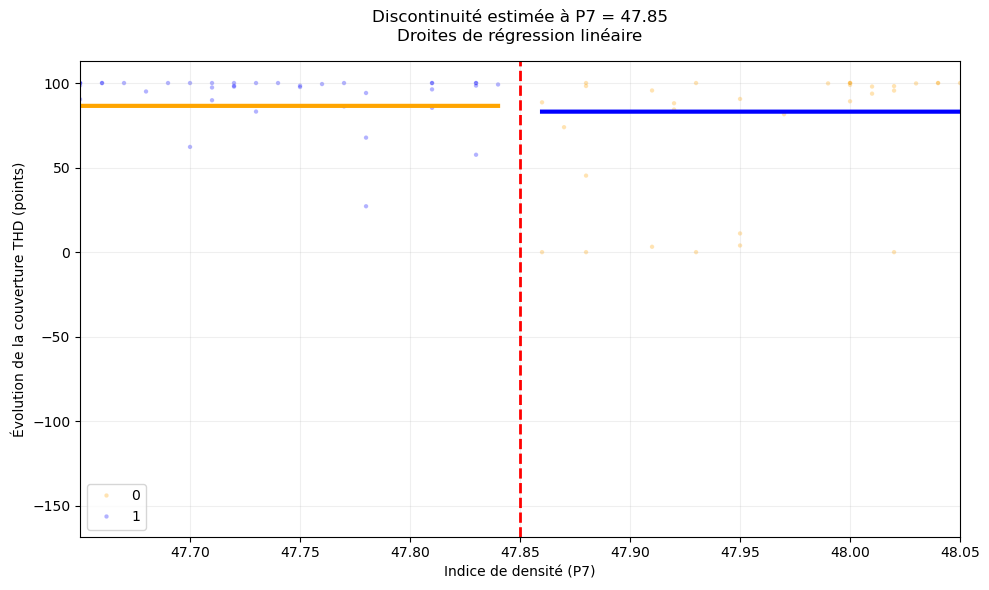

In [247]:
# 4. Visualisation clean : droites uniquement + seuil
plt.figure(figsize=(10, 6))

# Nuage de points avec transparence
sns.scatterplot(x='P7', y='Evolution_couverture_2017_2024',
                hue='sous_seuil',
                data=df_final,
                palette={0: 'orange', 1: 'blue'},
                alpha=0.3, s=10)

# Droite pour communes au-dessus du seuil
sns.regplot(x='P7', y='Evolution_couverture_2017_2024',
            data=df_final[df_final['P7'] >= seuil_auto],
            scatter=False, ci=None,
            line_kws={'color': 'blue', 'lw': 3, 'label': f'Dense (≥ {seuil_auto:.2f})'})

# Droite pour communes en-dessous du seuil
sns.regplot(x='P7', y='Evolution_couverture_2017_2024',
            data=df_final[df_final['P7'] < seuil_auto],
            scatter=False, ci=None,
            line_kws={'color': 'orange', 'lw': 3, 'label': f'Peu dense (< {seuil_auto:.2f})'})

# Ligne verticale du seuil
plt.axvline(x=seuil_auto, color='red', linestyle='--', lw=2)

# Titres et légendes
plt.title(f"Discontinuité estimée à P7 = {seuil_auto:.2f}\nDroites de régression linéaire", pad=15)
plt.xlabel("Indice de densité (P7)")
plt.ylabel("Évolution de la couverture THD (points)")
plt.legend()
plt.grid(alpha=0.2)

# Zoom local autour du seuil (ajuster si nécessaire)
plt.xlim(seuil_auto - 0.2, seuil_auto + 0.2)
plt.tight_layout()
plt.savefig('seuilrdd.png')
plt.show()



L’estimation par régression avec discontinuité, autour d’un seuil de densité détecté automatiquement à P7 = 47.85, met en évidence une fracture significative dans la dynamique de couverture THD. Les communes juste en dessous du seuil présentent une progression moyenne supérieure de 2.66 points (p = 0.002), ce qui peut traduire un effort de rattrapage ciblé. Néanmoins, cette amélioration est contrecarrée par une pente négative marquée (−0.69, p < 0.001) indiquant que, sous le seuil, une densité plus élevée ne suffit pas à accélérer la couverture.

L’effet quadratique significatif (−0.0066, p < 0.001) confirme une relation non linéaire, suggérant des rendements décroissants. Ce résultat révèle un décrochage persistant des zones très peu denses, malgré une densité croissante. Le R² très faible (0.9%) indique toutefois que la densité, bien que déterminante localement, ne suffit pas à expliquer les écarts de couverture à elle seule.
